In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Accident_Information.csv')
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
print(df.isna().sum())

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [4]:
dfa = df.dropna(axis = 0)

In [5]:
dfa.isna().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

In [6]:
#Split the data into smaller size
from sklearn.model_selection import train_test_split
dfa_90, dfa_10 = train_test_split(dfa, test_size=0.1, random_state=0)
dfa_10.shape

(112998, 34)

In [7]:
target = 'Accident_Severity'

In [8]:
# Dropped Accodent_Index since it's irrelevant to the target
X = dfa_10.drop(columns=[target, 'Accident_Index'])
y = dfa_10[target]

In [9]:
for j in range(X.shape[1]):
    print(X.columns[j] + ':')
    print(X.iloc[:,j].value_counts(), end='\n\n')

1st_Road_Class:
A               55052
Unclassified    32381
B               14158
C               10136
Motorway         1144
A(M)              127
Name: 1st_Road_Class, dtype: int64

1st_Road_Number:
0.0       31775
6.0         911
4.0         842
1.0         712
38.0        709
23.0        706
5.0         631
41.0        586
3.0         569
40.0        555
10.0        517
2.0         484
34.0        469
259.0       450
13.0        420
61.0        419
57.0        414
11.0        402
58.0        374
56.0        371
24.0        352
27.0        347
12.0        341
406.0       335
20.0        335
4020.0      333
30.0        327
205.0       312
59.0        311
60.0        311
          ...  
1467.0        1
7513.0        1
773.0         1
6193.0        1
1629.0        1
3225.0        1
4435.0        1
5297.0        1
6847.0        1
7161.0        1
1244.0        1
869.0         1
2526.0        1
4364.0        1
5635.0        1
2545.0        1
5055.0        1
5392.0        1
6846.0        1

E01000004    169
E01004736    151
E01011365     96
E01032739     90
E01005131     87
E01004764     72
E01016952     70
E01006650     67
E01008440     66
E01004763     62
E01004689     61
E01007876     59
E01013869     58
E01002444     57
E01010521     56
E01013644     53
E01005127     53
E01010844     49
E01005134     47
E01004733     47
E01012456     47
E01009150     47
E01016730     45
E01001771     44
E01028521     44
E01013607     43
E01016969     43
E01011107     42
E01000914     42
E01004309     42
            ... 
W01001029      1
E01021626      1
E01007404      1
E01025800      1
E01015548      1
W01001472      1
E01003786      1
E01005949      1
E01009458      1
E01008900      1
E01001311      1
E01011507      1
E01032544      1
E01020120      1
E01012173      1
E01026256      1
E01008959      1
W01001933      1
E01001205      1
E01010872      1
E01015940      1
W01001672      1
E01024406      1
E01007265      1
E01007556      1
E01020356      1
E01018305      1
E01011071     

In [10]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [11]:
feature_value_names = X.columns
X.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1044169,A,4229.0,Unclassified,0.0,None,2010-02-04,Thursday,1.0,Give way or uncontrolled,T or staggered junction,...,South Wales,Dry,Single carriageway,None,60.0,11:39,Rural,Fine no high winds,2010,No
83031,Unclassified,0.0,A,457.0,None,2005-04-15,Friday,2.0,Give way or uncontrolled,T or staggered junction,...,West Midlands,Dry,Single carriageway,None,30.0,08:30,Urban,Unknown,2005,No
634817,Unclassified,0.0,Unclassified,0.0,None,2008-12-05,Friday,1.0,Give way or uncontrolled,Roundabout,...,Humberside,Dry,Single carriageway,None,30.0,16:43,Urban,Fine no high winds,2008,No
1158154,A,416.0,Unclassified,408.0,None,2011-08-17,Wednesday,1.0,Give way or uncontrolled,Slip road,...,Thames Valley,Dry,Single carriageway,None,30.0,10:50,Urban,Fine no high winds,2011,No
1789896,C,0.0,Unclassified,0.0,None,2016-07-11,Monday,1.0,Give way or uncontrolled,T or staggered junction,...,Metropolitan Police,Wet or damp,One way street,None,30.0,15:20,Urban,Raining no high winds,2016,No


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,1st_Road_Class,2nd_Road_Class,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),LSOA_of_Accident_Location,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
1044169,0,5,2,1860,4,3,9,4,36,15,27460,31,1,3,4,698,0,2,0
83031,5,0,2,104,0,3,9,4,99,45,8104,40,1,3,4,509,1,9,0
634817,5,5,2,1434,0,3,7,4,169,74,10475,18,1,3,4,1002,1,2,0
1158154,0,5,2,2419,6,3,8,4,72,19,14528,37,1,3,4,649,1,2,0
1789896,3,5,2,4209,1,3,9,4,165,72,2429,24,5,1,4,919,1,6,0
1673919,0,5,2,3790,5,3,9,4,188,88,4274,14,5,0,4,839,1,6,0
81286,5,5,2,30,1,3,9,4,375,171,8695,40,5,3,4,679,1,6,0
1849077,0,0,2,4256,2,1,7,4,94,40,11099,7,5,2,4,974,1,6,0
1410527,5,5,2,3051,0,3,9,4,375,171,8665,40,1,3,4,764,1,2,0
633510,2,5,2,1130,5,3,0,4,110,47,10656,18,5,3,4,529,0,2,0


In [14]:
y.value_counts()

Slight     98212
Serious    13902
Fatal        884
Name: Accident_Severity, dtype: int64

In [15]:
y = le.fit_transform(y)

pd.DataFrame(data=y, columns=['target'])['target'].value_counts()

2    98212
1    13902
0      884
Name: target, dtype: int64

In [16]:
#Use RandomOverSampler for over sampling the data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X,y)

pd.DataFrame(data=y, columns=['target'])['target'].value_counts()

2    98212
1    98212
0    98212
Name: target, dtype: int64

In [17]:
#Divide the data into training and testing sets for the features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size= .20, random_state=0)

In [18]:
#Hyperparameter tuning and model selection
#A list is created containing each of the five models to be tested
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
       'gnb': GaussianNB()}

In [19]:
#The list above is then implemented into a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [20]:
#Parameter grids are set to hold the parameter values for each model
param_grids = {}

In [21]:
#Logistic Regression - hyperparameters
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]


param_grids['lr'] = param_grid

In [22]:
#MLP Classifier - hyperparameters
param_grid = [{'clf__hidden_layer_sizes': [100],
               'clf__activation': ['logistic', 'tanh', 'relu']}]


param_grids['mlp'] = param_grid

In [23]:
#Decision Tree - hyperparameters
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['dt'] = param_grid

In [24]:
#Random Forest - hyperparameters
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]


param_grids['rf'] = param_grid

In [25]:
#GNB -hyperparameters
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]


param_grids['gnb'] = param_grid

In [26]:
#Grid Search hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
   
    gs = gs.fit(X_train, y_train)
    
    print(name)
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

lr
mlp
dt
rf
gnb


In [27]:
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

for best_score_param_estimator in best_score_param_estimators:

     print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.9865935818894565, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.9419493610738711, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.7446374327557825, {'clf__activation': 'logistic', 'clf__hidden_layer_sizes': 100}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.4865469139783121, {'clf__C': 1000, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.4710998353895498, {'clf__var_smoothing': 1e-10}, <class 'sklearn.naive_bayes.GaussianNB'>]



In [28]:
print('Accuracy:', end=' ')
print(best_score_param_estimators[0][2].score(X_test, y_test))

Accuracy: 0.9902253597610643


In [29]:
print('Accuracy:', end=' ')
print(best_score_param_estimators[1][2].score(X_test, y_test))

Accuracy: 0.947189790931306


In [30]:
print('Accuracy:', end=' ')
print(best_score_param_estimators[2][2].score(X_test, y_test))

Accuracy: 0.7398180830844421


In [31]:
print('Accuracy:', end=' ')
print(best_score_param_estimators[3][2].score(X_test, y_test))

Accuracy: 0.4839634808579962


In [32]:
print('Accuracy:', end=' ')
print(best_score_param_estimators[4][2].score(X_test, y_test))

Accuracy: 0.47009910399131144


In [33]:
random = best_score_param_estimators[0][2]

random

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non...imators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [34]:
decision = best_score_param_estimators[1][2]
decision

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [35]:
print(random.named_steps['clf'].feature_importances_)

[0.01690487 0.05184087 0.01423122 0.02865354 0.0013358  0.07271122
 0.03727324 0.02292061 0.0074349  0.02279579 0.06537211 0.01164821
 0.04800889 0.03986587 0.06557412 0.06480979 0.06572795 0.06867775
 0.01864128 0.03380532 0.00060068 0.01505078 0.02789687 0.01096438
 0.01395473 0.00239399 0.02883086 0.07954846 0.01138708 0.01256711
 0.03857173 0.        ]


In [36]:
feature_importances = pd.Series(random.named_steps['clf'].feature_importances_, feature_value_names)

In [37]:
feature_importances_df = pd.DataFrame({'features':feature_value_names,'Feature_Importance':random.named_steps['clf'].feature_importances_})

In [38]:
feature_importances_main = feature_importances_df.sort_values(by ='Feature_Importance',ascending=False)

<BarContainer object of 32 artists>

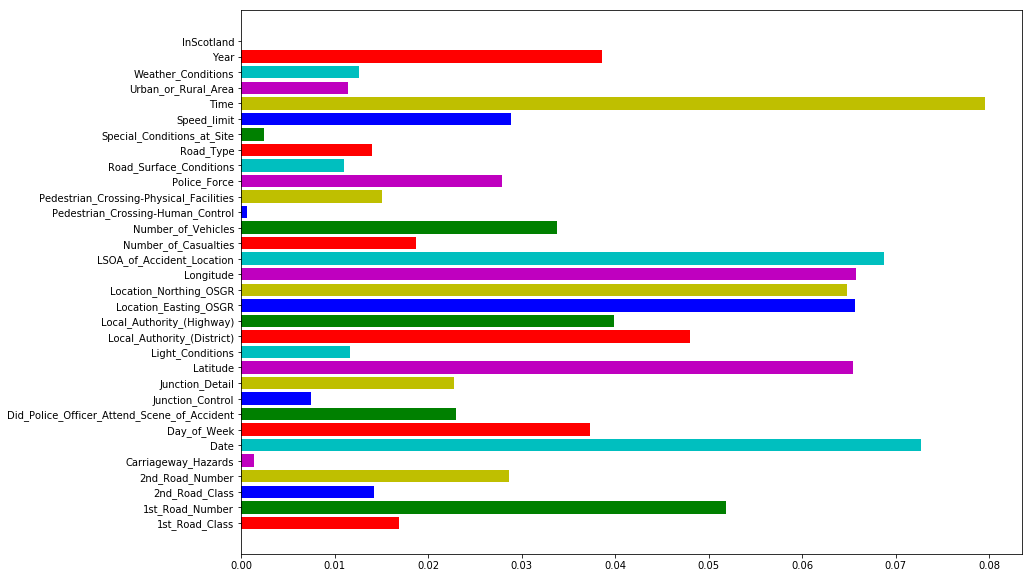

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.barh(feature_value_names,random.named_steps['clf'].feature_importances_ ,color = 'rgbymc')

In [60]:
pipe_clfs['dt']

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [61]:
#Build new pipeline for decision tree
pipe = Pipeline([('StandardScaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier(max_depth=4))])

In [62]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

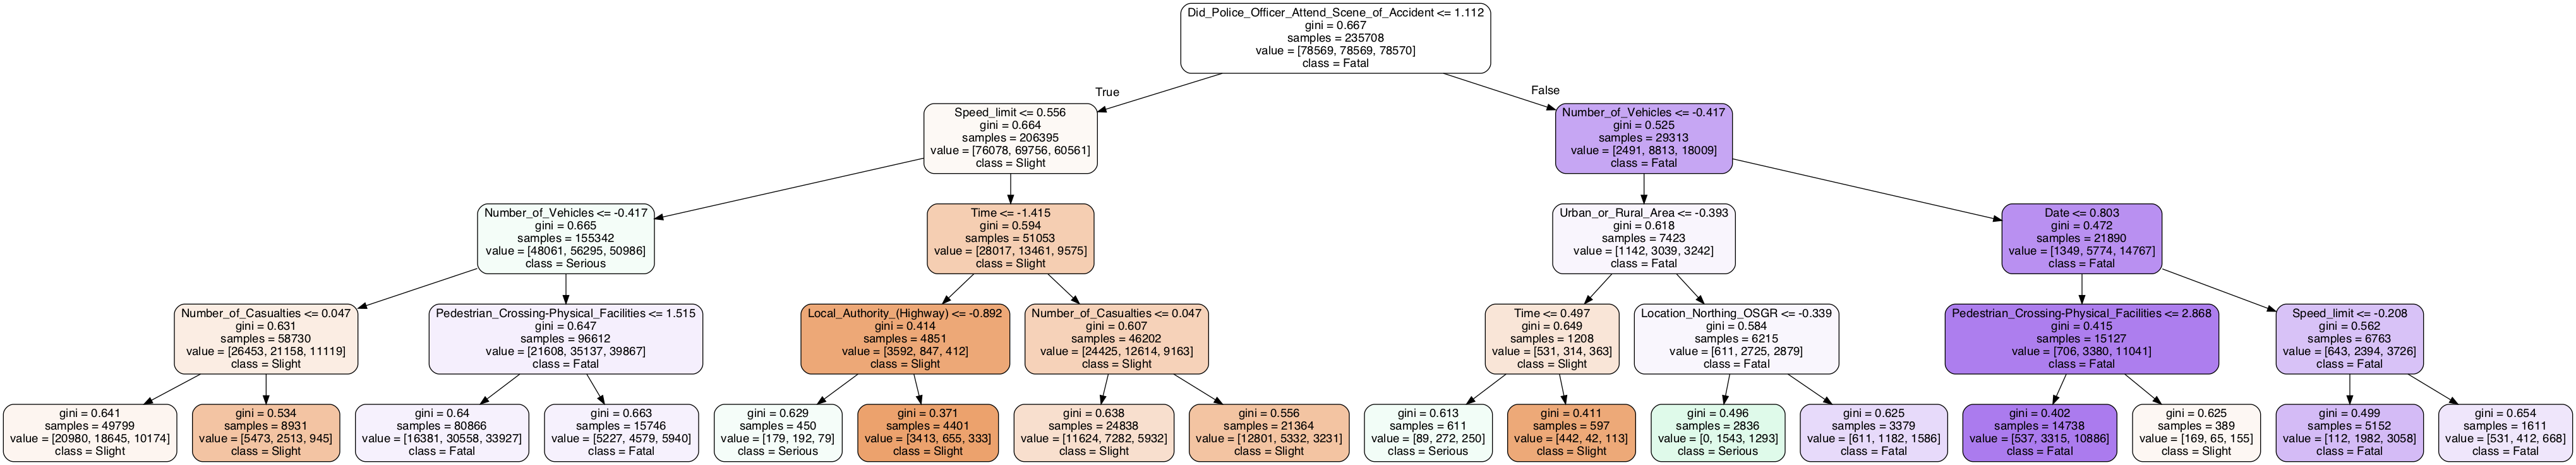

In [63]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(pipe.named_steps['clf'],
                           filled=True, 
                           rounded=True,
                           class_names=['Slight', 'Serious', 
                                        'Fatal'],
                           feature_names=feature_value_names,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 